In [7]:
!pip install xgboost

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder as LE
import matplotlib.pyplot as plt
import numpy as np
import pickle
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve

In [9]:
df = pd.read_csv('/content/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
fraud_rows = df[df['isFraud'] == 1]
non_fraud_rows = df[df['isFraud'] == 0]

non_fraud_sample_size = 50000

non_fraud_sample = non_fraud_rows.sample(n=non_fraud_sample_size, random_state=42)


sampled_df = pd.concat([fraud_rows, non_fraud_sample])


sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Class distribution in sampled data:")
print(sampled_df['isFraud'].value_counts())

Class distribution in sampled data:
isFraud
0    50000
1     8213
Name: count, dtype: int64


In [12]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [13]:
df.shape

(6362620, 11)

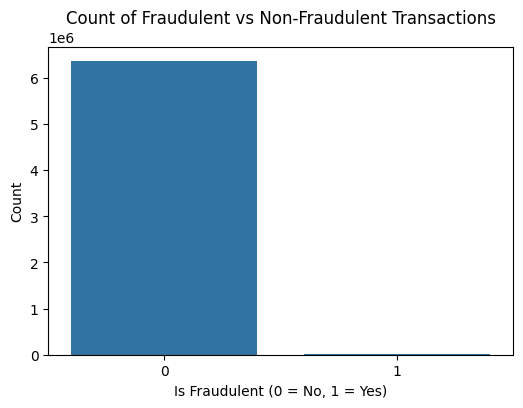

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='isFraud')
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

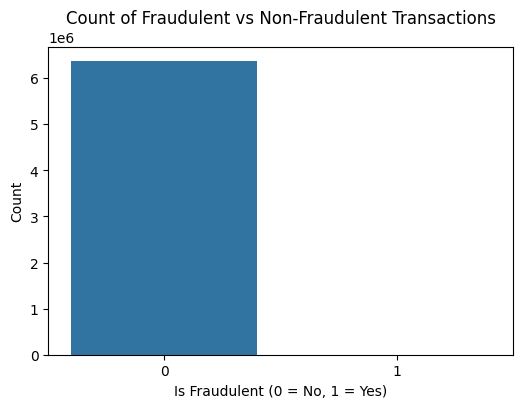

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='isFlaggedFraud')
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [16]:
s,t=0,0
for x in df['isFlaggedFraud']:
    if x==1:
        s=s+1
    else:
        t=t+1
print(f'{s,t}')

(16, 6362604)


In [17]:
s,t=0,0
for x in df['isFraud']:
    if x==1:
        s=s+1
    else:
        t=t+1
print(f'{s,t}')

(8213, 6354407)


In [18]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [19]:
df1=df
df1 = df1.drop(['step', 'nameOrig', 'nameDest','isFlaggedFraud'], axis=1)

In [20]:
from sklearn.preprocessing import OneHotEncoder

a=df1['type'].unique()


In [21]:
df1 = pd.get_dummies(df1, columns=['type'])
print("Data with One-Hot Encoding:")
df1.head()

Data with One-Hot Encoding:


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


In [22]:
df1 = df1.drop(columns=['isFraud'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
df1 = pd.DataFrame(scaled_data, columns=df1.columns)
df1.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,-0.530965,-0.736484,-0.08096,1.399036,-0.302345
1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,-0.530965,-0.736484,-0.08096,1.399036,-0.302345
2,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,-0.530965,-0.736484,-0.08096,-0.714778,3.307478
3,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,-0.530965,1.357803,-0.08096,-0.714778,-0.302345
4,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,-0.530965,-0.736484,-0.08096,1.399036,-0.302345


In [23]:
df1.shape

(6362620, 10)

In [24]:
j={
    'knn':{
        'model':LogisticRegression(),
        'parameter':
        {
            'penalty':['l1','l2','elasticnet',None],
            'dual':[True,False],
            'intercept_scaling':np.arange(0,1.5,0.01),
            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'class_weight':['balanced',{0:1,1:770},{0:1,1:771},{0:1,1:773},{0:1,1:774},{0:1,1:775},{0:1,1:776},{0:1,1:777}],
            'n_iter':[4,10]
        }
    },
    'ridge':{
        'model':Ridge(),
        'parameter':
        {
            'alpha':np.arange(0,1.5,0.01),
            'fit_intercept':[True,False],
            'copy_X':[True,False],
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
            'class_weight':['balanced',{0:1,1:770},{0:1,1:771},{0:1,1:773},{0:1,1:774},{0:1,1:775},{0:1,1:776},{0:1,1:777}],
            'n_iter':[4,10]
        }
    },
    'lasso':{
        'model':Lasso(),
        'parameter':
        {
            'alpha':np.arange(0,1.5,0.1),
            'fit_intercept':[True,False],
            'copy_X':[True,False],
            'warm_start':[True,False],
            'positive':[True,False],
            'selection':{'cyclic', 'random'},
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
            'class_weight':['balanced',{0:1,1:770},{0:1,1:771},{0:1,1:773},{0:1,1:774},{0:1,1:775},{0:1,1:776},{0:1,1:777}],
            'n_iter':[4,10]
        }
    },
    'AdaBoost':{
        'model':AdaBoostClassifier(),
        'parameter':
        {
            'n_estimators':np.arange(25,75),
            'learning_rate':np.arange(0.1,1.5,0.1),
            'algorithm':['SAMME', 'SAMME.R'],
            'class_weight':['balanced',{0:1,1:770},{0:1,1:771},{0:1,1:773},{0:1,1:774},{0:1,1:775},{0:1,1:776},{0:1,1:777}],
            'n_iter':[4,10]
        }
    },
    'Bagging':{
        'model': BaggingClassifier(),
        'parameter':
        {
            'n_estimators':np.arange(15,20),
            'max_samples':np.arange(5,10),
            'max_features':np.arange(5,10),
            'bootstrap_features':[True,False],
            'oob_score':[True,False],
            'warm_start':[True,False],
            'n_jobs':-1,
            'class_weight':['balanced',{0:1,1:770},{0:1,1:771},{0:1,1:773},{0:1,1:774},{0:1,1:775},{0:1,1:776},{0:1,1:777}],
            'n_iter':[4,10]
        }
    },
    'XGBoost':{
        'model':XGBClassifier(),
        'parameter':
        {
            'booster':['gbtree','gblinear','dart'],
            #'class_weight':['balanced',{0:1,1:770},{0:1,1:771},{0:1,1:773},{0:1,1:774},{0:1,1:775},{0:1,1:776},{0:1,1:777}],
            #'n_iter':[4,10]
        }},
    'Random Forest':{
        'model':RandomForestClassifier(),
        'parameter':
        {
            'n_estimators':np.arange(75,120),
            'criterion':['gini', 'entropy', 'log_loss'],
            'max_features':['sqrt', 'log2', None],
            'bootstrap':[True,False],
            'n_jobs':-1,
            'warm_startbool':[True,False],
            'class_weight':['balanced', 'balanced_subsample'],
            'max_samples':np.arange(1,7),
            'max_iter':2000,
            'class_weight':['balanced',{0:1,1:770},{0:1,1:771},{0:1,1:773},{0:1,1:774},{0:1,1:775},{0:1,1:776},{0:1,1:777}],
            'n_iter':[4,10]
        }
    },
    'Naive Bayes':{
    'model':GaussianNB(),
    'parameter':{}},
    'Feed Forward Neural Network':
    {
    'model':MLPClassifier(),
    'parameter':
        {
            'hidden_layer_sizes':[(16,32,1)],
            'activation':['identity', 'logistic', 'tanh', 'relu'],
            'solver':['lbfgs', 'sgd', 'adam'],
            'alpha':np.arange(0.00001,0.01,0.001),
            'batch_size':np.arange(50,100),
            'learning_rate':['constant', 'invscaling', 'adaptive'],
            'early_stopping':[True],
            'class_weight':['balanced',{0:1,1:770},{0:1,1:771},{0:1,1:773},{0:1,1:774},{0:1,1:775},{0:1,1:776},{0:1,1:777}],
            'n_iter':[4,10]
        }
    }
}

In [25]:
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy=matthews_corrcoef(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5653306386372381


In [ ]:
s=[]
from sklearn.model_selection import GridSearchCV
for m,p in j.items():
  try:
    GV=GridSearchCV(p['model'],p['parameter'],cv=5,scoring='matthews_corrcoef')
    GV.fit(X_train,y_train)
    s.append({'model_name':m,'model_param':GV.best_params_,'score':GV.best_score_})
  except:
    pass

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:51:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight", "n_iter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:51:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight", "n_iter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:52:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight", "n_iter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:52:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight", "n_iter" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:53:36] WARNING: /workspace/src/learner.cc:740: 
Parame

In [ ]:
dfr=pd.DataFrame(s,columns=['model_name','model_param','score'])
dfr.to_csv('result.csv', index=False)
dfr